In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict, defaultdict
sns.set_style("whitegrid")
import scipy
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('out.csv')

In [4]:
n_word = len(data['word'].unique())
n_odor = len(data['odor'].unique())
n_exp = n_odor*n_word

## Aroma metrics

In [8]:
print('Expected value of normed latency:')

print(data.groupby('odor')['latency_normed'].mean().sort_values())
print()

print('Standart deviation of normed latency:')

print(data.groupby('odor')['latency_normed'].std())
print('Among all dataset:' + str(data.latency_normed.mean()))


Expected value of normed latency:
odor
Fresh       1.515232
Yellow      1.590074
Bright      1.648890
Beatiful    1.673314
Sweet       1.752132
Funny       1.760013
Name: latency_normed, dtype: float64

Standart deviation of normed latency:
odor
Beatiful    1.095694
Bright      1.083750
Fresh       1.001688
Funny       1.019980
Sweet       1.033280
Yellow      1.030161
Name: latency_normed, dtype: float64
Among all dataset:1.6539881258455371


In [9]:
print('Expected value of unnormalized latency :')

print(data.groupby('odor')['latency'].mean().sort_values())
print()
print('Standar deviation of unnormalized latency :')

print(data.groupby('odor')['latency'].std())
print('Among all dataset:' + str(data.latency.mean()))

Expected value of unnormalized latency :
odor
Fresh       0.878913
Yellow      0.888260
Beatiful    0.895275
Bright      0.905460
Funny       0.937444
Sweet       0.939835
Name: latency, dtype: float64

Standar deviation of unnormalized latency :
odor
Beatiful    0.349388
Bright      0.377948
Fresh       0.379952
Funny       0.357626
Sweet       0.374749
Yellow      0.344454
Name: latency, dtype: float64
Among all dataset:0.9072705570491129


## Paired tables

### Average value of normed latency for participant/aroma pair

In [10]:
d_odor_avg = data.groupby(['participant', 'odor'])['latency_normed'].mean().to_dict(OrderedDict)

cols_odor_avg = sorted(set([col for row, col in d_odor_avg.keys()]))
rows_odor_avg = sorted(set([row for row, col in d_odor_avg.keys()]))  

avgs_odor = np.array(list(d_odor_avg.values())).reshape(28, -1)


In [11]:
pd.DataFrame(avgs_odor, rows_odor_avg, cols_odor_avg)

,Beatiful,Bright,Fresh,Funny,Sweet,Yellow
001-1,1.787438,0.733517,1.316863,1.558791,1.591896,1.429602
011-1,2.601620,2.079829,2.230218,2.217346,2.338903,2.544619
013-1,1.120050,2.488857,0.592191,1.887623,1.693256,1.585897
017-1,NaN,1.221875,2.300796,1.159054,1.618165,1.189617
018-,1.650829,1.375935,1.269216,1.274636,1.175010,1.069419
020-1,1.468973,1.692576,1.507095,1.778883,2.326199,1.257170
10.0,1.247676,0.987968,2.816722,2.010899,2.278220,1.448180
12.0,1.180351,1.354934,1.912739,1.996853,2.076333,1.568460
14.0,2.488037,1.244846,0.873922,1.716963,1.811123,1.599763
15.0,2.056419,1.379862,1.298141,2.601891,2.052058,1.124645


<AxesSubplot:>

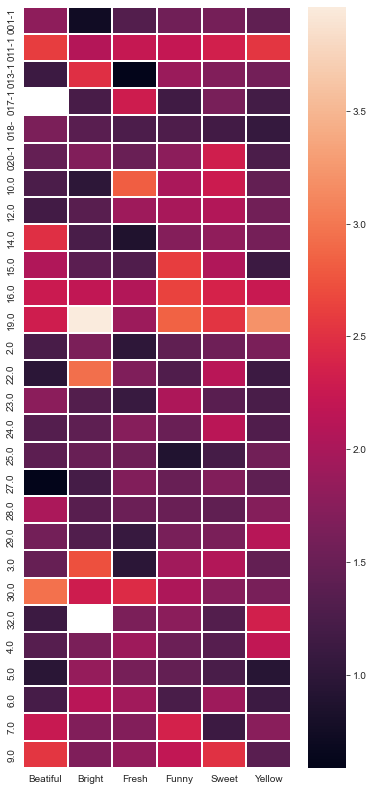

In [12]:
fig, ax = plt.subplots(figsize=(6,14))
sns.heatmap(pd.DataFrame(avgs_odor, rows_odor_avg, cols_odor_avg), linewidths=.1, ax = ax)

### Average values of normed latency for participant/word pair

In [13]:
d_word_avg = data.groupby(['participant', 'word'])['latency_normed'].mean().to_dict(OrderedDict)

cols_word_avg = sorted(set([col for row, col in d_word_avg.keys()]))
rows_word_avg = sorted(set([row for row, col in d_word_avg.keys()]))

avgs_word = np.array(list(d_word_avg.values())).reshape(28, -1)
pd.DataFrame(avgs_word, rows_word_avg, cols_word_avg)

,ВЕСЕЛЫЙ,ВКУСНЫЙ,ЖЕЛТЫЙ,ЗЕЛЕНЫЙ,КРАСИВЫЙ,МОРСКОЙ,НАДЕЖНЫЙ,СВЕЖИЙ,СВЕТЛЫЙ,СЛАДКИЙ,СОЧНЫЙ,СПОКОЙНЫЙ,ЧИСТЫЙ
001-1,1.117279,2.431049,1.304316,1.569029,1.624437,0.386148,1.486885,1.015381,0.990470,0.681382,1.594210,2.010102,1.351377
011-1,1.736361,2.943897,2.721262,2.444599,1.824887,2.408115,2.487545,3.140371,2.701984,1.817512,1.473580,2.398926,2.261454
013-1,1.052414,1.850895,0.993772,1.467003,1.025849,1.710120,0.864667,1.778980,1.516453,2.598060,1.405806,1.013853,2.980678
017-1,1.891365,1.206174,1.353675,2.934388,0.466395,NaN,1.073264,0.497146,1.986609,2.364594,0.359278,1.176583,NaN
018-,0.939216,1.224832,1.119973,1.577940,1.572379,0.732176,1.502128,1.986006,0.885431,0.812125,1.554715,1.089857,1.870462
020-1,1.054771,1.246475,2.333430,2.004604,1.931632,1.984788,1.503433,1.944672,1.701554,0.901036,1.763866,1.502605,1.880607
10.0,0.000000,1.449142,1.160166,NaN,1.720058,0.343952,1.635453,NaN,1.514685,2.816722,NaN,3.168558,NaN
12.0,1.504102,1.879273,2.142287,1.512086,1.970294,1.248419,1.501618,1.686115,2.837260,0.834371,1.409564,2.467850,1.998032
14.0,1.353833,1.605939,NaN,2.488037,0.632202,NaN,1.084424,1.643880,1.552087,1.370951,1.564768,1.731952,1.355979
15.0,2.210994,0.923934,1.457918,1.633159,0.743984,1.949679,2.014555,2.117498,1.797817,1.728399,1.500690,2.072750,1.864540


<AxesSubplot:>

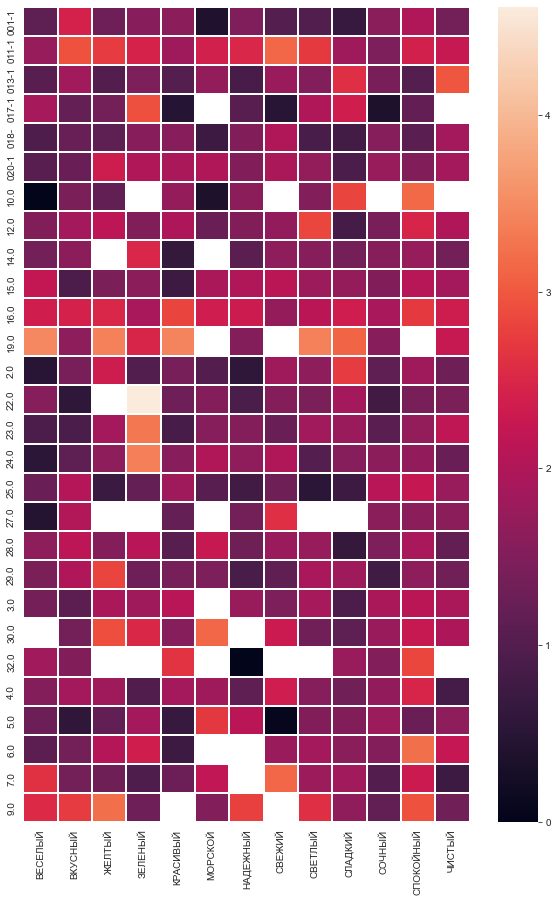

In [14]:
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(pd.DataFrame(avgs_word, rows_word_avg, cols_word_avg), linewidths=.1, ax = ax)

### Pairs aroma-word

In [15]:
d = data.groupby(['odor', 'word'])['latency_normed'].mean().to_dict(OrderedDict)
cols = sorted(set([col for row, col in d.keys()]))
rows = sorted(set([row for row, col in d.keys()]))
avgs = np.array(list(d.values())).reshape(6, -1)
pairwise = pd.DataFrame(avgs, index=rows, columns=cols)
pairwise


,ВЕСЕЛЫЙ,ВКУСНЫЙ,ЖЕЛТЫЙ,ЗЕЛЕНЫЙ,КРАСИВЫЙ,МОРСКОЙ,НАДЕЖНЫЙ,СВЕЖИЙ,СВЕТЛЫЙ,СЛАДКИЙ,СОЧНЫЙ,СПОКОЙНЫЙ,ЧИСТЫЙ
Beatiful,1.514289,1.952296,1.692798,2.032297,1.180447,0.922002,1.973393,1.470023,1.496110,1.758881,1.487962,2.035750,1.932997
Bright,1.115062,1.789645,1.684613,1.576650,1.672578,2.224236,1.575679,2.029129,1.927570,1.378734,1.301051,1.738131,2.043213
Fresh,1.392341,1.138025,1.951107,1.781880,1.488776,1.606042,1.154668,1.672894,1.349412,1.607803,1.343194,1.956950,1.343637
Funny,1.629862,1.640864,2.152160,1.691862,1.742050,1.702029,1.789567,1.599481,1.748469,1.994065,1.696376,2.168448,1.547821
Sweet,1.524437,1.597588,1.818080,2.454309,1.296403,1.663382,1.161414,2.184627,1.885652,1.449503,1.809217,1.751187,2.185927
Yellow,1.173672,1.595325,1.875775,1.468105,1.514500,2.294186,1.574459,1.830012,1.522205,1.474597,1.479008,1.696985,1.457856


<AxesSubplot:>

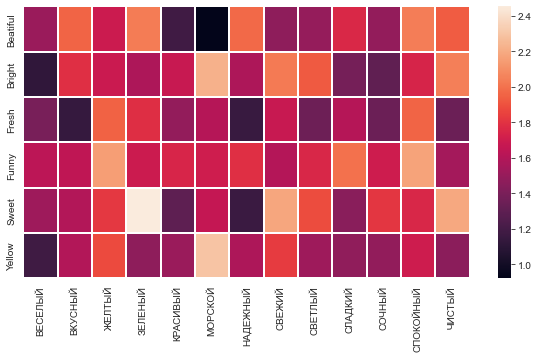

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pairwise, linewidths=.1, ax = ax)

In [19]:
idxs_latency = np.argsort(data.latency.groupby(data.comb).apply(np.mean)).values#для каждого сочетание смотрят среднюю латентность, потом присваивает место в сортировке по возрастанию, и возвращает эти места
latencies = data.latency.groupby(data.comb).apply(np.mean).values
latencies_per_odor = data.latency.groupby(data.odor)
distrib = []

for k in latencies_per_odor:
    distrib.append(k[1])

## Histograms

### Latency by aromas

C:\Users\User\AppData\Local\Temp\ipykernel_10696\208273873.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


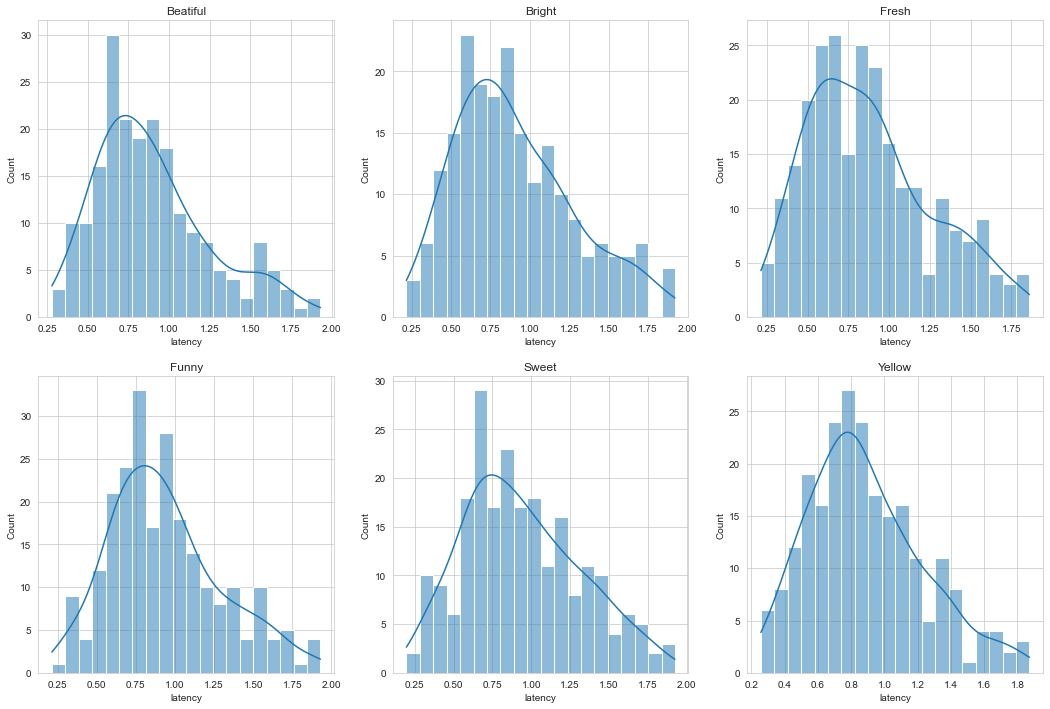

In [20]:
fig, axes = plt.subplots(2, 3, figsize = (18,12))


sns.histplot(distrib[0], ax=axes[0, 0], bins=20, kde = True).set(title='Beatiful')
sns.histplot(distrib[1], ax=axes[0, 1], bins=20, kde = True).set(title='Bright')
sns.histplot(distrib[2], ax=axes[0, 2], bins=20, kde = True).set(title='Fresh')

sns.histplot(distrib[3], ax=axes[1, 0], bins=20, kde = True).set(title='Funny')
sns.histplot(distrib[4], ax=axes[1, 1], bins=20, kde = True).set(title='Sweet')
sns.histplot(distrib[5], ax=axes[1, 2], bins=20, kde = True).set(title='Yellow')
fig.show()

### Normed latency grouped by aroma

C:\Users\User\AppData\Local\Temp\ipykernel_10696\660753546.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


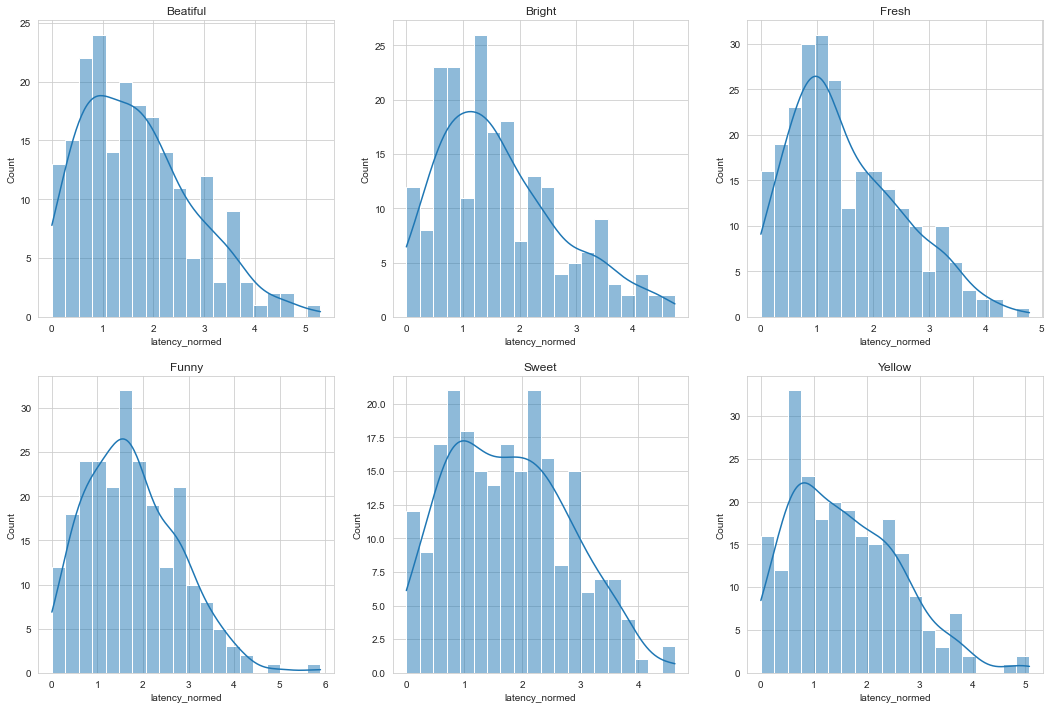

In [21]:
latencies_norm_per_odor = data.latency_normed.groupby(data.odor)
distrib_norm = []

for k in latencies_norm_per_odor:

    distrib_norm.append(k[1])
    
fig, axes = plt.subplots(2, 3, figsize = (18,12))

sns.histplot(distrib_norm[0], ax=axes[0, 0], bins=20, kde = True).set(title='Beatiful')
sns.histplot(distrib_norm[1], ax=axes[0, 1], bins=20, kde = True).set(title='Bright')
sns.histplot(distrib_norm[2], ax=axes[0, 2], bins=20, kde = True).set(title='Fresh')

sns.histplot(distrib_norm[3], ax=axes[1, 0], bins=20, kde = True).set(title='Funny')
sns.histplot(distrib_norm[4], ax=axes[1, 1], bins=20, kde = True).set(title='Sweet')
sns.histplot(distrib_norm[5], ax=axes[1, 2], bins=20, kde = True).set(title='Yellow')
fig.show()


In [22]:
stds = data.latency.groupby(data.comb).apply(np.std)
stds[idxs_latency].to_csv('combs.csv', encoding='utf-8-sig')
tup_combs = [] 

for trace_combs in data.latency.groupby(data.comb):
    tup_combs.append(trace_combs)
    

In [23]:

len_tup = []
for element in tup_combs:
    len_tup.append(len(element[1]))
ending = min(len_tup)

In [24]:
tup_combs_trunc_lat = []
tup_combs_trunc_lat_full = []    
tup_combs_trunc_col = [] # merged names
tup_combs_trunc_ratio = []# freq of using
lat_for_3d = []
for element in tup_combs:
    tup_combs_trunc_col.append(element[0])
    tup_combs_trunc_lat.append(element[1][:ending]) 
    tup_combs_trunc_lat_full.append(element[1])
    tup_combs_trunc_ratio.append(np.sum(~np.isnan(element[1])) / len(element[1]))
    lat_for_3d.append(element[1].mean())

In [25]:
tup_data = data.loc[:, ['comb','latency']]
tup_data['columns'] = tup_data.groupby('comb')['latency'].cumcount()
comb_df= tup_data.pivot(index='comb', columns='columns')

In [27]:
comb_df

latency                                                    \
columns                 0         1         2         3         4         5    
comb                                                                           
BeatifulВЕСЕЛЫЙ   0.848665  1.053317  0.280270       NaN  0.673828  1.148182   
BeatifulВКУСНЫЙ   1.931011  0.666817  1.145314  0.543818  0.912739  0.696807   
BeatifulЖЕЛТЫЙ    0.403522       NaN       NaN  0.866507  0.827707  0.636573   
BeatifulЗЕЛЕНЫЙ   1.103368  1.524177       NaN  0.961716       NaN       NaN   
BeatifulКРАСИВЫЙ  0.926443  1.116025  0.502574  0.510167  0.775642       NaN   
...                    ...       ...       ...       ...       ...       ...   
YellowСВЕТЛЫЙ     0.558868  0.544198  0.617009  0.730059  0.852161       NaN   
YellowСЛАДКИЙ     1.070302  0.613763  1.008783       NaN       NaN       NaN   
YellowСОЧНЫЙ      0.990725  1.059113  0.555056  1.095776  0.847235  0.829780   
YellowСПОКОЙНЫЙ   0.701138  1.108211  1.067765       NaN       NaN  0.600295   
YellowЧИСТЫЙ      0.891216       NaN       NaN       NaN       NaN  0.433729   

                                                          ...                \
columns                 6         7         8         9   ...        30  31   
comb                                                      ...                 
BeatifulВЕСЕЛЫЙ   0.422288       NaN  1.556716       NaN  ...       NaN NaN   
BeatifulВКУСНЫЙ   0.408086  1.286078       NaN       NaN  ...       NaN NaN   
BeatifulЖЕЛТЫЙ         NaN  1.239606       NaN  0.820188  ...       NaN NaN   
BeatifulЗЕЛЕНЫЙ        NaN       NaN  0.749892  0.659519  ...       NaN NaN   
BeatifulКРАСИВЫЙ       NaN       NaN       NaN       NaN  ...       NaN NaN   
...                    ...       ...       ...       ...  ...       ...  ..   
YellowСВЕТЛЫЙ     1.266043  1.415404       NaN  0.810124  ...  1.136105 NaN   
YellowСЛАДКИЙ     0.708990       NaN  0.827396  0.757287  ...       NaN NaN   
YellowСОЧНЫЙ           NaN       NaN  0.546685  0.888130  ...       NaN NaN   
YellowСПОКОЙНЫЙ   1.414113       NaN  1.382870       NaN  ...       NaN NaN   
YellowЧИСТЫЙ      1.281463  0.740985       NaN  0.872263  ...       NaN NaN   

                                                                          
columns                 32        33        34        35  36  37  38  39  
comb                                                                      
BeatifulВЕСЕЛЫЙ        NaN       NaN       NaN       NaN NaN NaN NaN NaN  
BeatifulВКУСНЫЙ   1.019835  1.612765  0.883365  0.964579 NaN NaN NaN NaN  
BeatifulЖЕЛТЫЙ         NaN       NaN       NaN       NaN NaN NaN NaN NaN  
BeatifulЗЕЛЕНЫЙ        NaN       NaN       NaN       NaN NaN NaN NaN NaN  
BeatifulКРАСИВЫЙ       NaN       NaN       NaN       NaN NaN NaN NaN NaN  
...                    ...       ...       ...       ...  ..  ..  ..  ..  
YellowСВЕТЛЫЙ          NaN       NaN       NaN       NaN NaN NaN NaN NaN  
YellowСЛАДКИЙ          NaN       NaN       NaN       NaN NaN NaN NaN NaN  
YellowСОЧНЫЙ           NaN       NaN       NaN       NaN NaN NaN NaN NaN  
YellowСПОКОЙНЫЙ        NaN       NaN       NaN       NaN NaN NaN NaN NaN  
YellowЧИСТЫЙ           NaN       NaN       NaN       NaN NaN NaN NaN NaN  

[78 rows x 40 columns]

Text(0.5, 1.0, 'Unnormed latency distribution by participants ')

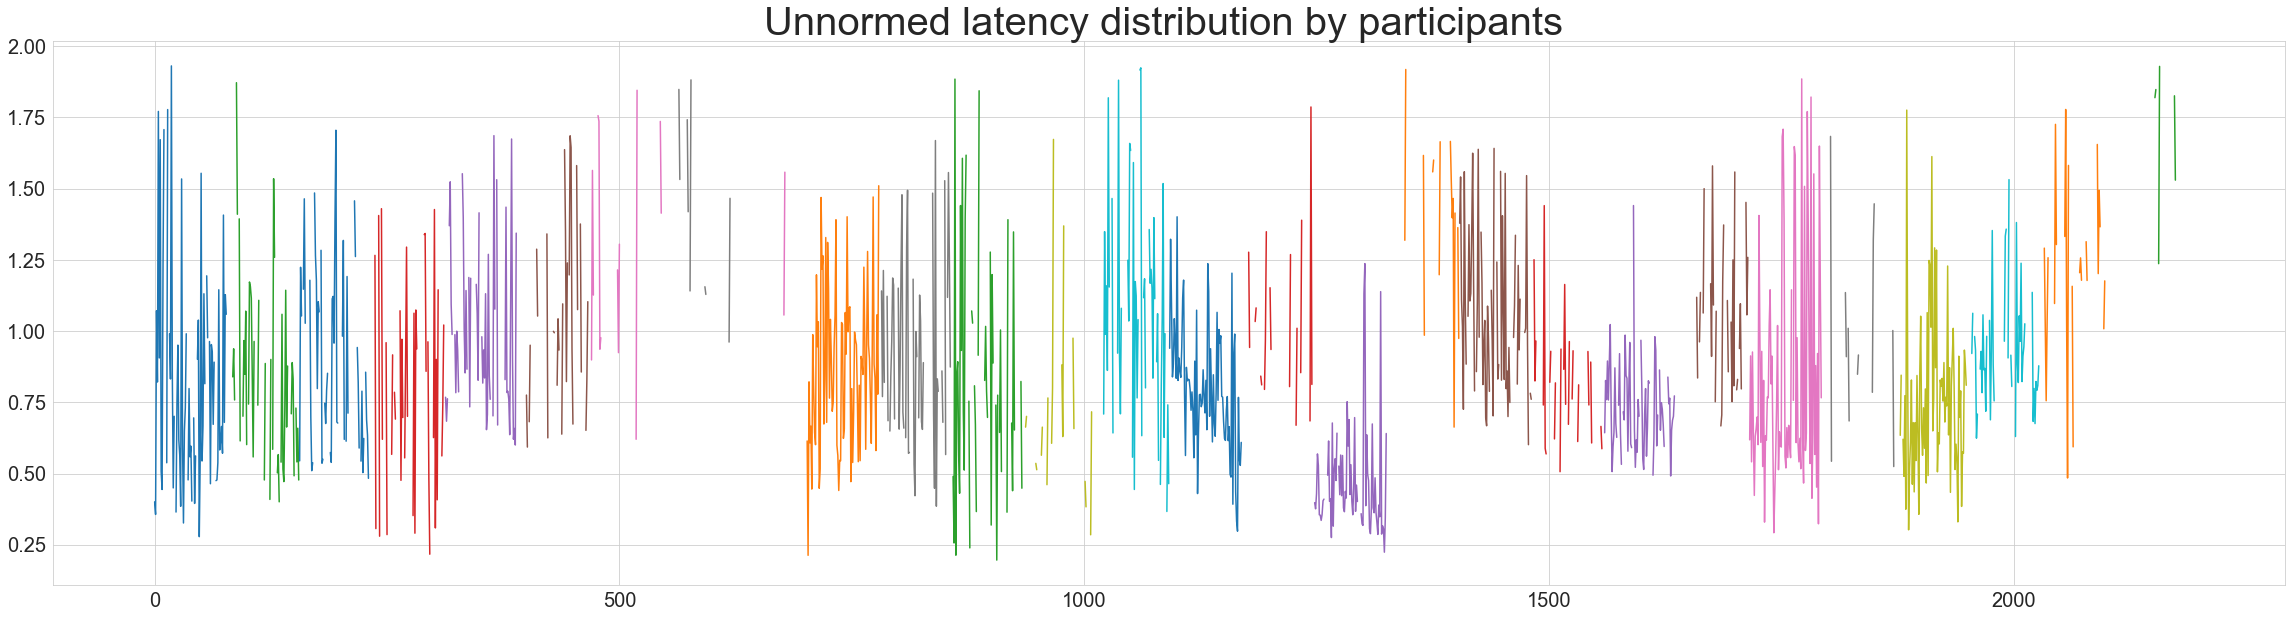

In [26]:
idxs = np.argsort(tup_combs_trunc_ratio)
tup = []
fig = plt.figure(figsize=(40, 10))

for trace in data.latency.groupby(data.participant):
    plt.plot(trace[1])
    tup.append(trace[1].values)
plt.xticks(fontsize  = 20)   
plt.yticks(fontsize  = 20)
plt.title('Unnormed latency distribution by participants ', fontsize  = 40)  


In [27]:
subjects_combs = np.stack(tup_combs_trunc_lat)
subjects_combs =  subjects_combs.T
subjects_combs.sort(0)
df_np_trunc = pd.DataFrame(subjects_combs)
df_np_trunc.reindex(columns=np.argsort(tup_combs_trunc_ratio))


,9,52,68,16,18,70,42,5,24,57,...,27,71,74,69,35,46,38,65,61,48
0,0.665534,0.567504,0.409351,0.285864,0.278574,0.426474,0.629327,0.516408,0.410466,0.429919,...,0.319396,0.471882,0.318240,0.461071,0.356728,0.583106,0.285254,0.367487,0.363458,0.639714
1,0.682068,0.672243,0.562010,0.461754,1.197728,1.036513,0.776563,0.563493,0.903728,0.475294,...,0.324356,0.536323,0.613763,0.541758,0.449797,0.593143,0.477902,0.383245,0.546394,0.663146
2,1.080936,0.707513,0.601521,0.642702,1.606740,1.074344,0.905937,0.603878,1.061329,0.528725,...,0.357929,0.712104,0.708990,0.632979,0.710953,0.743964,0.516737,0.400949,0.574060,0.673973
3,1.410310,0.900878,0.709882,0.835351,1.736837,1.128939,0.910460,0.656181,1.637119,0.839544,...,0.444302,0.773369,0.757287,0.752989,0.843394,0.819401,0.557346,0.477632,0.665689,0.830213
4,NaN,1.185657,0.784571,0.847253,NaN,1.224628,0.963624,0.724540,NaN,0.970785,...,0.541083,0.835090,0.827396,0.754231,0.988277,0.832254,0.614517,0.498136,0.696695,0.932274
5,NaN,1.615426,1.156550,1.122112,NaN,1.391243,0.963664,0.778813,NaN,NaN,...,0.544606,0.874046,1.008783,0.789376,0.992178,0.900749,0.695684,0.562149,0.700837,0.939844
6,NaN,NaN,NaN,1.249016,NaN,NaN,0.968767,NaN,NaN,NaN,...,0.558475,0.934268,1.010169,0.884466,1.030838,0.959611,0.747275,0.716511,0.937171,0.987773
7,NaN,NaN,NaN,1.506138,NaN,NaN,0.982280,NaN,NaN,NaN,...,0.564425,0.951958,1.070302,1.056560,1.060141,1.071527,0.898995,0.801445,0.942718,1.075558
8,NaN,NaN,NaN,NaN,NaN,NaN,1.113410,NaN,NaN,NaN,...,0.606369,1.065427,1.664837,1.145241,1.381772,1.131225,0.903084,0.821507,1.217033,1.215025
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.663398,1.121998,1.665967,1.147178,1.493507,1.283787,0.950710,0.934145,1.319029,1.224213


In [28]:
click = []
for i in data.participant.unique():
    click.append(data[data.participant == str(i)].latency.count())
df_click = pd.DataFrame(click, index = data.participant.unique(), columns=['click_num'])    

<AxesSubplot:title={'center':'Number of clicks by participants disribution '}>

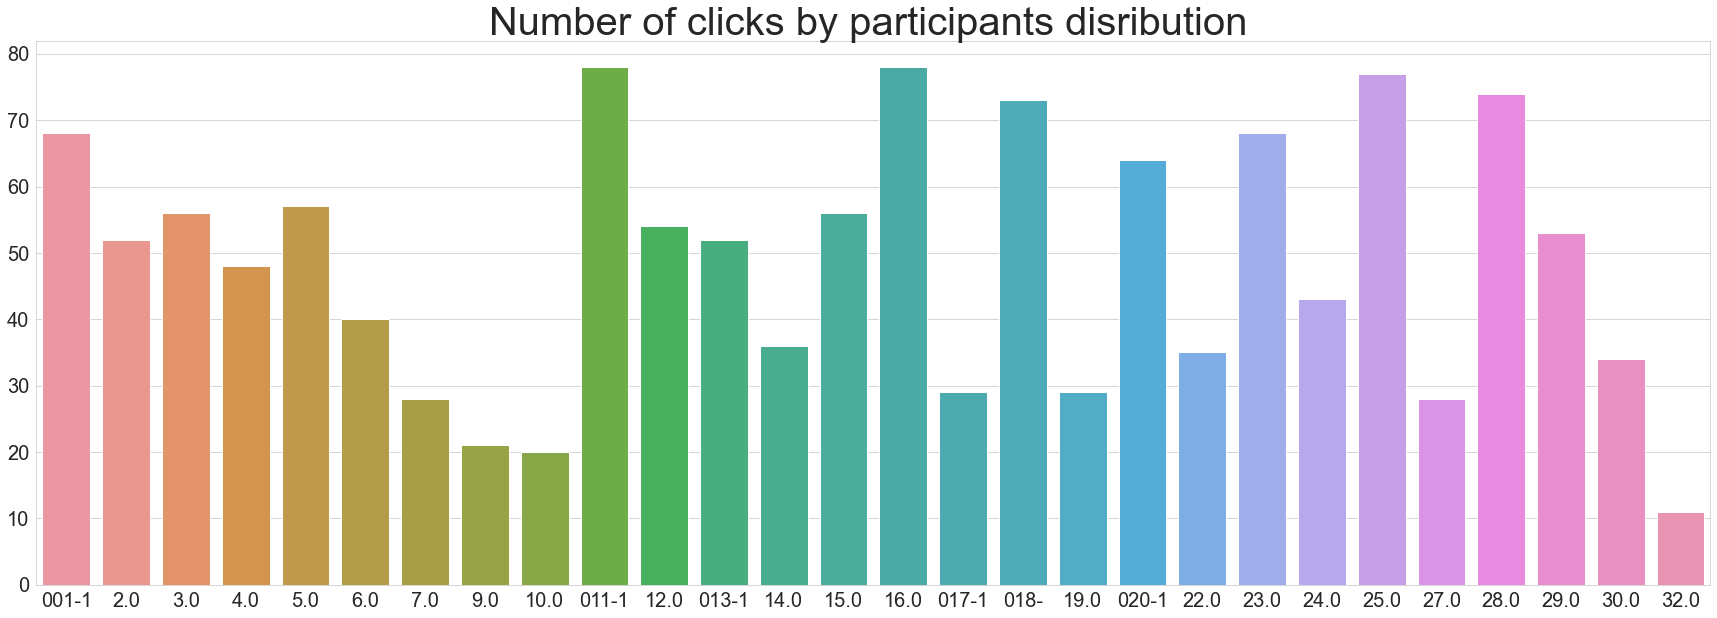

In [29]:
fig = plt.figure(figsize=(30, 10))

plt.xticks(fontsize  = 20)   
plt.yticks(fontsize  = 20)
plt.title('Number of clicks by participants disribution ', fontsize  = 40)  
sns.barplot(data = df_click.T)

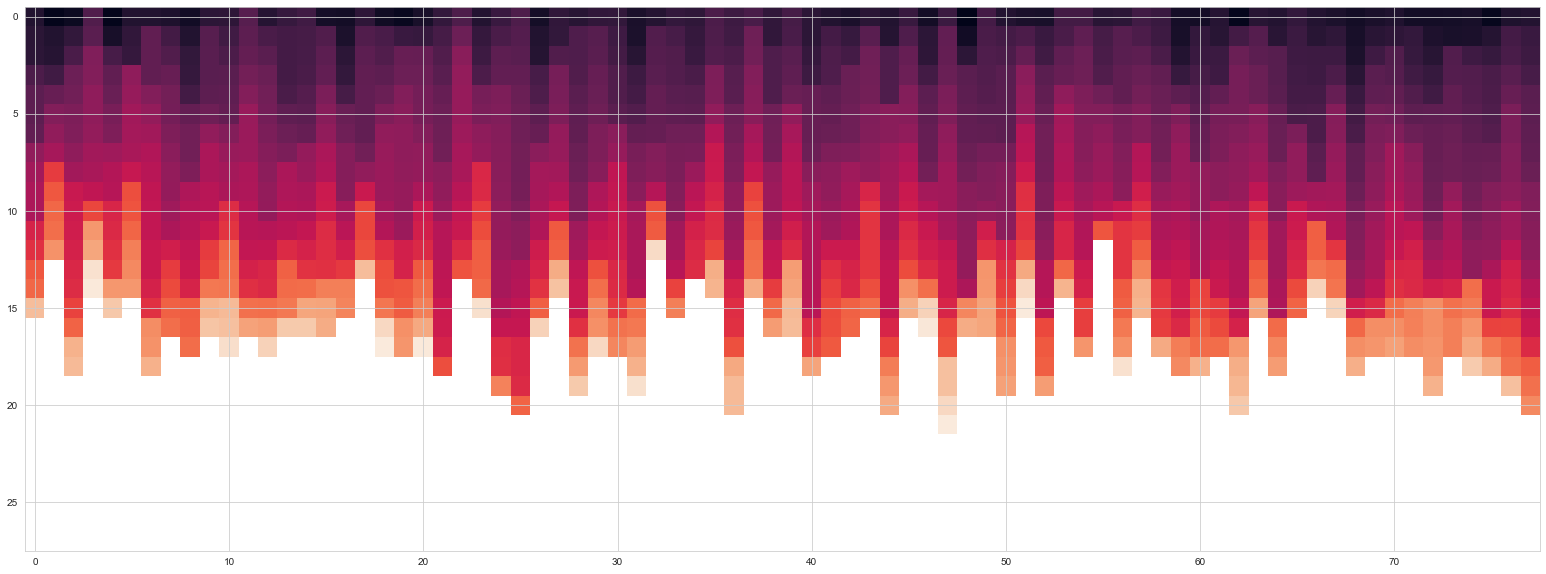

In [30]:
subjects = np.stack(tup)
subjects.sort(0)
df_np = pd.DataFrame(subjects)
fig = plt.figure(figsize=(30, 10))
plt.imshow(df_np)

In [31]:
tup_df = pd.DataFrame(tup)

Text(0.5, 1.0, 'Latency heatmap for combinations word-aroma')

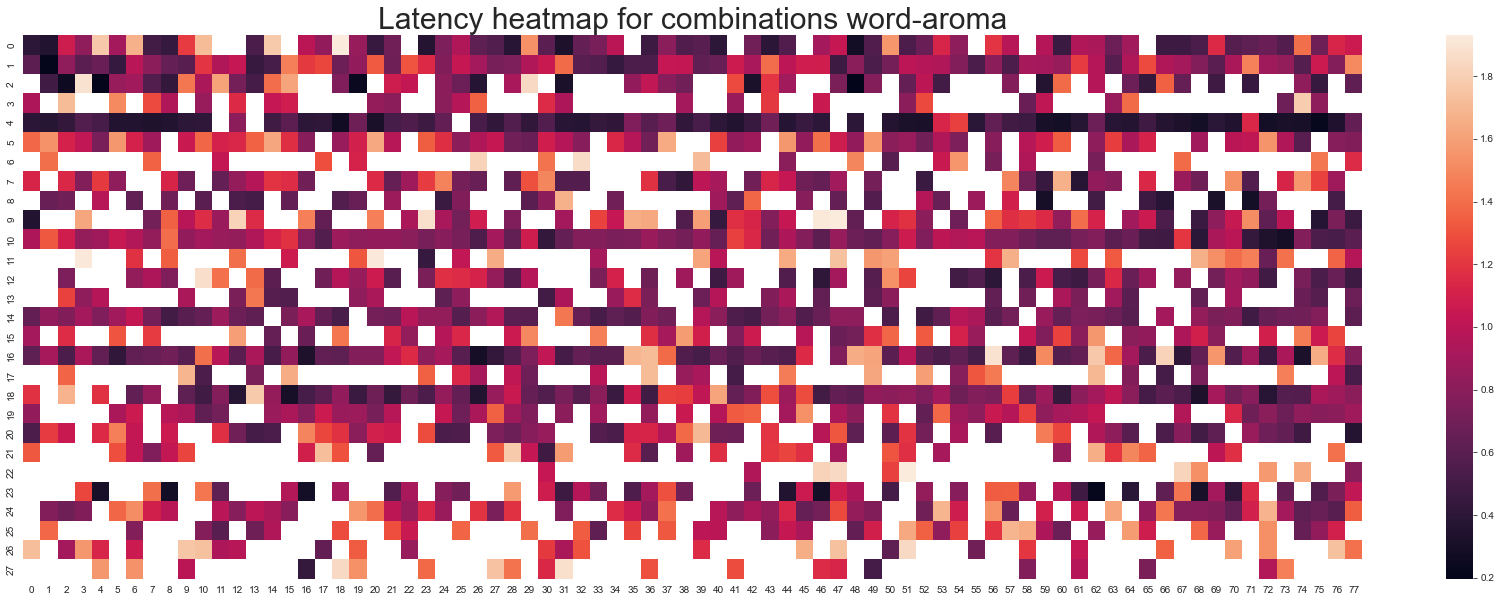

In [33]:
fig = plt.figure(figsize=(30, 10))
sns.heatmap(tup_df)
plt.xticks(fontsize  = 10)   
plt.yticks(fontsize  = 10)
plt.title('Latency heatmap for combinations word-aroma', fontsize  = 30)  

Text(0.5, 1.0, 'Normed latency heatmap for combinations word-aroma ')

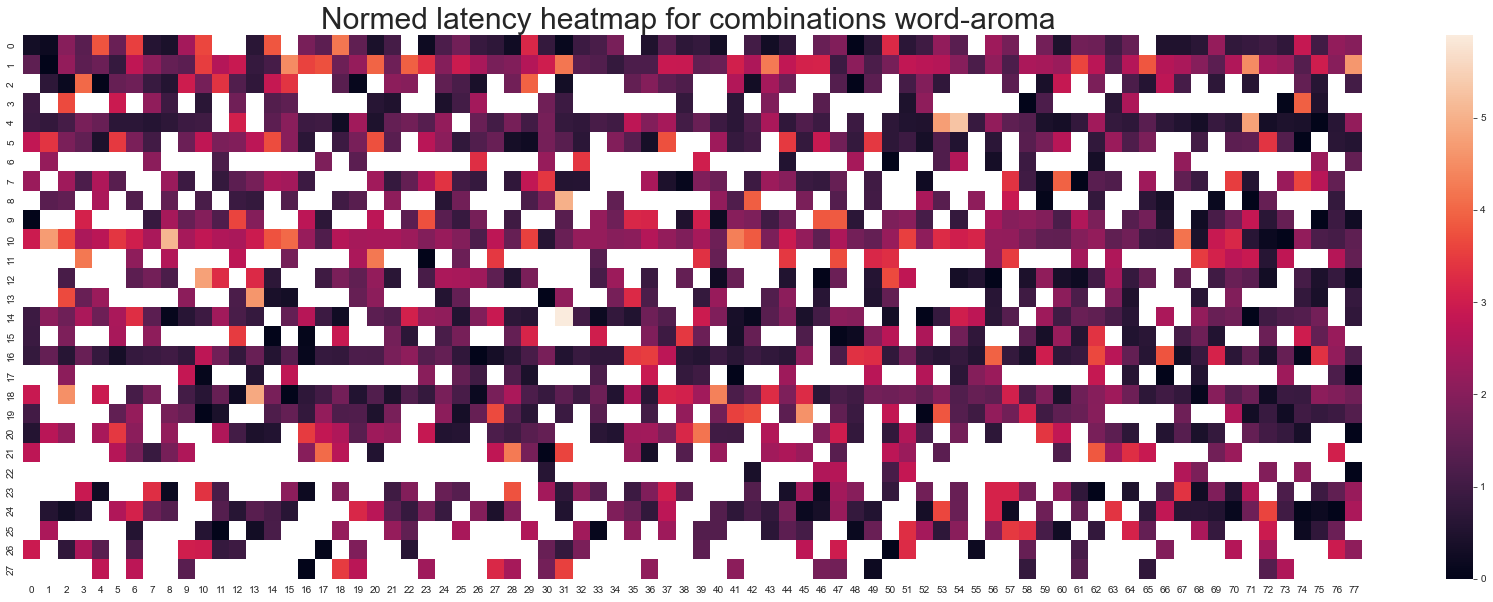

In [34]:
tup_norm = []

for trace in data.latency_normed.groupby(data.participant):
    tup_norm.append(trace[1].values)
tup_norm_df = pd.DataFrame(tup_norm)
fig = plt.figure(figsize=(30, 10))
sns.heatmap(tup_norm_df)
plt.xticks(fontsize  = 10)   
plt.yticks(fontsize  = 10)
plt.title('Normed latency heatmap for combinations word-aroma ', fontsize  = 30)  

Text(0, 0.5, 'Clicks ratio')

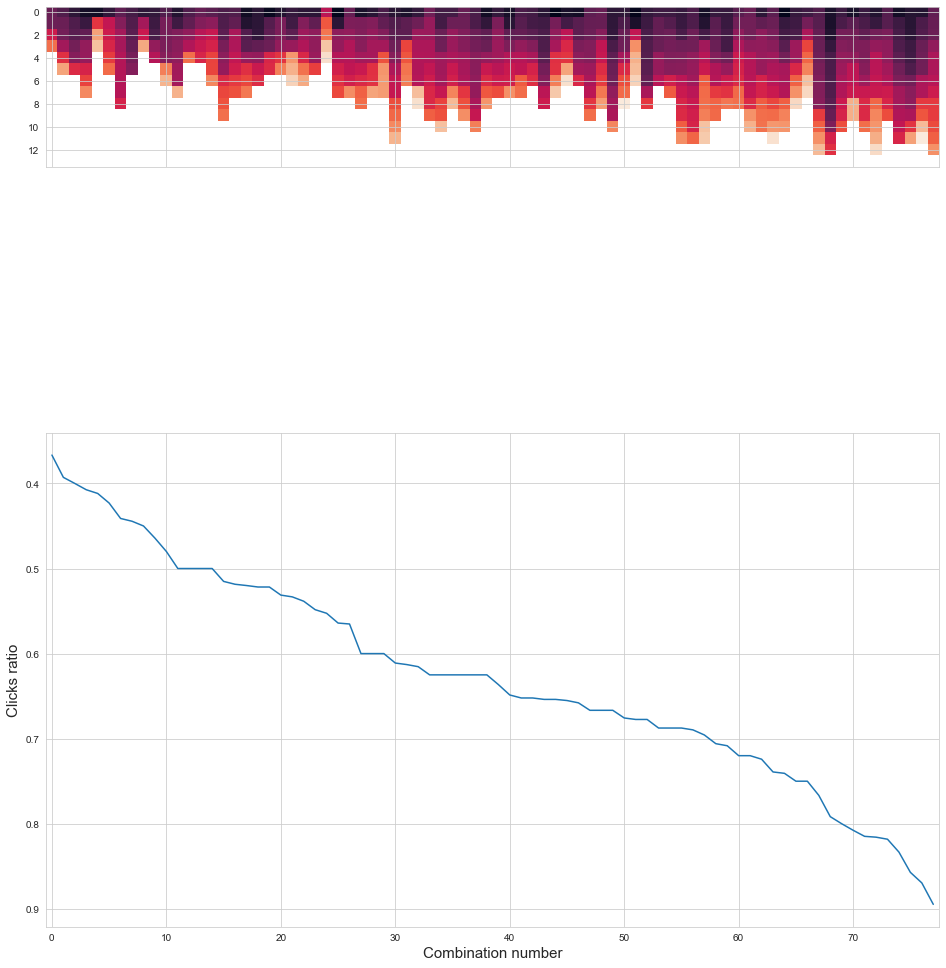

In [36]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize = (16,20))
im = ax[0].imshow(df_np_trunc.reindex(columns=idxs))

ax[1].plot(np.sort(tup_combs_trunc_ratio))

ax[1].invert_yaxis()
ax[1].set_xlabel('Combination number', fontsize = 15)
ax[1].set_ylabel('Clicks ratio', fontsize = 15)
# plt.tight_layout()
# ax.x_labels(tup_combs_trunc_ratio)fig, ax = plt.subplots(2, 1, sharex=True)

In [37]:
print('Top 20 most clickable')
for i in range(20):
    print(i+1,tup_combs_trunc_col[idxs[i]])

    

Top 20 most clickable
1 BeatifulСЛАДКИЙ
2 SweetВЕСЕЛЫЙ
3 YellowЗЕЛЕНЫЙ
4 BrightЗЕЛЕНЫЙ
5 BrightМОРСКОЙ
6 YellowМОРСКОЙ
7 FunnyЗЕЛЕНЫЙ
8 BeatifulМОРСКОЙ
9 BrightСПОКОЙНЫЙ
10 SweetМОРСКОЙ
11 BrightНАДЕЖНЫЙ
12 FunnyМОРСКОЙ
13 SweetЗЕЛЕНЫЙ
14 SweetЖЕЛТЫЙ
15 BrightСВЕЖИЙ
16 YellowСВЕТЛЫЙ
17 YellowЖЕЛТЫЙ
18 SweetНАДЕЖНЫЙ
19 BeatifulСВЕЖИЙ
20 FreshМОРСКОЙ


In [38]:
ratios = np.array(tup_combs_trunc_ratio)

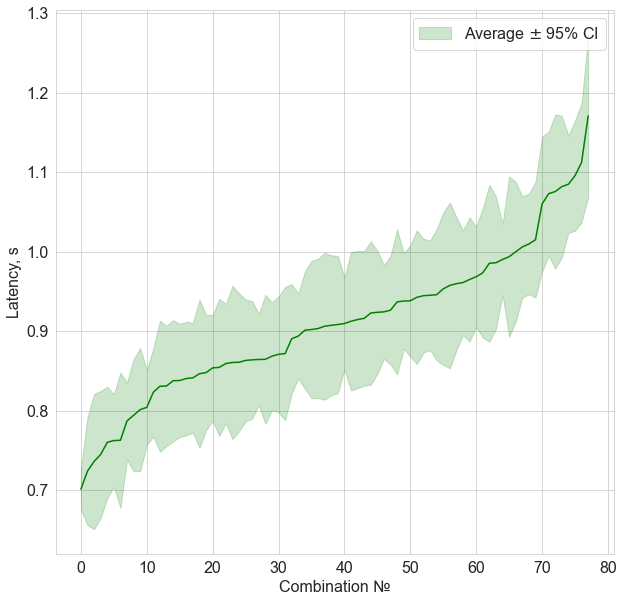

In [39]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(n_exp), latencies[idxs_latency], color="green")
CI = 1.96 * stds[idxs_latency].values / np.sqrt(n_exp)
plt.fill_between(np.arange(n_exp), latencies[idxs_latency] - CI,
                 latencies[idxs_latency] + CI,
                 alpha=.2, color="green", label=r'Average $\pm$ 95% CI')
plt.legend(fontsize=16)
plt.ylabel("Latency, s", size=16)
plt.xlabel("Combination №", size=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("latency_avg.png")

Text(0.5, 1.0, 'Average latency for combination word-aroma')

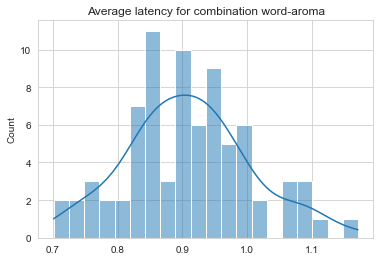

In [40]:
fig = plt.figure()
sns.histplot(latencies, kde=True, bins=20)
plt.title('Average latency for combination word-aroma')


In [41]:
mean_lat = comb_df.mean(axis = 1)
comb_df.insert(comb_df.shape[1], column="mean_latency", value=mean_lat)

comb_df

In [42]:
comb_df

latency                                                    \
columns                  0         1         2         3         4         5   
comb                                                                           
BeatifulВЕСЕЛЫЙ   0.848665  1.053317  0.280270       NaN  0.673828  1.148182   
BeatifulВКУСНЫЙ   1.931011  0.666817  1.145314  0.543818  0.912739  0.696807   
BeatifulЖЕЛТЫЙ    0.403522       NaN       NaN  0.866507  0.827707  0.636573   
BeatifulЗЕЛЕНЫЙ   1.103368  1.524177       NaN  0.961716       NaN       NaN   
BeatifulКРАСИВЫЙ  0.926443  1.116025  0.502574  0.510167  0.775642       NaN   
...                    ...       ...       ...       ...       ...       ...   
YellowСВЕТЛЫЙ     0.558868  0.544198  0.617009  0.730059  0.852161       NaN   
YellowСЛАДКИЙ     1.070302  0.613763  1.008783       NaN       NaN       NaN   
YellowСОЧНЫЙ      0.990725  1.059113  0.555056  1.095776  0.847235  0.829780   
YellowСПОКОЙНЫЙ   0.701138  1.108211  1.067765       NaN       NaN  0.600295   
YellowЧИСТЫЙ      0.891216       NaN       NaN       NaN       NaN  0.433729   

                                                          ...                \
columns                  6         7         8         9  ...  31        32   
comb                                                      ...                 
BeatifulВЕСЕЛЫЙ   0.422288       NaN  1.556716       NaN  ... NaN       NaN   
BeatifulВКУСНЫЙ   0.408086  1.286078       NaN       NaN  ... NaN  1.019835   
BeatifulЖЕЛТЫЙ         NaN  1.239606       NaN  0.820188  ... NaN       NaN   
BeatifulЗЕЛЕНЫЙ        NaN       NaN  0.749892  0.659519  ... NaN       NaN   
BeatifulКРАСИВЫЙ       NaN       NaN       NaN       NaN  ... NaN       NaN   
...                    ...       ...       ...       ...  ...  ..       ...   
YellowСВЕТЛЫЙ     1.266043  1.415404       NaN  0.810124  ... NaN       NaN   
YellowСЛАДКИЙ     0.708990       NaN  0.827396  0.757287  ... NaN       NaN   
YellowСОЧНЫЙ           NaN       NaN  0.546685  0.888130  ... NaN       NaN   
YellowСПОКОЙНЫЙ   1.414113       NaN  1.382870       NaN  ... NaN       NaN   
YellowЧИСТЫЙ      1.281463  0.740985       NaN  0.872263  ... NaN       NaN   

                                                               mean_latency  
columns                 33        34        35  36  37  38  39               
comb                                                                         
BeatifulВЕСЕЛЫЙ        NaN       NaN       NaN NaN NaN NaN NaN     0.831252  
BeatifulВКУСНЫЙ   1.612765  0.883365  0.964579 NaN NaN NaN NaN     0.959871  
BeatifulЖЕЛТЫЙ         NaN       NaN       NaN NaN NaN NaN NaN     0.942726  
BeatifulЗЕЛЕНЫЙ        NaN       NaN       NaN NaN NaN NaN NaN     1.006008  
BeatifulКРАСИВЫЙ       NaN       NaN       NaN NaN NaN NaN NaN     0.804341  
...                    ...       ...       ...  ..  ..  ..  ..          ...  
YellowСВЕТЛЫЙ          NaN       NaN       NaN NaN NaN NaN NaN     0.859441  
YellowСЛАДКИЙ          NaN       NaN       NaN NaN NaN NaN NaN     0.936903  
YellowСОЧНЫЙ           NaN       NaN       NaN NaN NaN NaN NaN     0.868720  
YellowСПОКОЙНЫЙ        NaN       NaN       NaN NaN NaN NaN NaN     0.968501  
YellowЧИСТЫЙ           NaN       NaN       NaN NaN NaN NaN NaN     0.890617  

[78 rows x 41 columns]

In [43]:
latency_rate = comb_df.sort_index().sort_values('mean_latency', kind='mergesort')

In [44]:
latency_rate

latency                                                    \
columns                 0         1         2         3         4         5   
comb                                                                          
BeatifulМОРСКОЙ  0.603878  0.516408       NaN       NaN       NaN       NaN   
YellowВЕСЕЛЫЙ    0.821507  0.562149  1.194211  0.477632  0.400949       NaN   
FreshВКУСНЫЙ     0.758462  0.558475  0.663398  0.541083  0.544606       NaN   
SweetНАДЕЖНЫЙ         NaN  0.596463       NaN  1.178704  1.261794  0.856012   
FreshСВЕТЛЫЙ     0.672877  0.623415       NaN  0.932098  1.494603  0.439860   
...                   ...       ...       ...       ...       ...       ...   
SweetСВЕЖИЙ      0.385216  0.695603  0.566724       NaN  0.788294  0.620737   
BrightСВЕЖИЙ          NaN       NaN       NaN  1.117310  1.047883  0.811389   
SweetЗЕЛЕНЫЙ          NaN  0.556387  1.407435       NaN       NaN       NaN   
SweetЧИСТЫЙ      1.225922  0.659357       NaN  1.021562  1.164354  0.789030   
FunnyСПОКОЙНЫЙ   1.534275       NaN       NaN       NaN       NaN       NaN   

                                                         ...            \
columns                 6         7         8         9  ...        31   
comb                                                     ...             
BeatifulМОРСКОЙ       NaN       NaN       NaN  0.724540  ...       NaN   
YellowВЕСЕЛЫЙ    1.604644       NaN  0.716511  0.801445  ...       NaN   
FreshВКУСНЫЙ     1.182564  0.324356  0.319396  0.564425  ...       NaN   
SweetНАДЕЖНЫЙ         NaN       NaN       NaN  1.438564  ...       NaN   
FreshСВЕТЛЫЙ          NaN  0.414145  0.402029  0.700266  ...       NaN   
...                   ...       ...       ...       ...  ...       ...   
SweetСВЕЖИЙ      1.287791  1.685680  1.376136       NaN  ...  1.465079   
BrightСВЕЖИЙ          NaN       NaN       NaN  1.250828  ...       NaN   
SweetЗЕЛЕНЫЙ          NaN  0.832144       NaN       NaN  ...       NaN   
SweetЧИСТЫЙ           NaN       NaN       NaN  1.440883  ...       NaN   
FunnyСПОКОЙНЫЙ   1.817767  1.716688  0.213204       NaN  ...       NaN   

                                                            mean_latency  
columns                32        33  34  35  36  37  38  39               
comb                                                                      
BeatifulМОРСКОЙ       NaN       NaN NaN NaN NaN NaN NaN NaN     0.701484  
YellowВЕСЕЛЫЙ         NaN       NaN NaN NaN NaN NaN NaN NaN     0.724176  
FreshВКУСНЫЙ          NaN       NaN NaN NaN NaN NaN NaN NaN     0.736350  
SweetНАДЕЖНЫЙ         NaN       NaN NaN NaN NaN NaN NaN NaN     0.745133  
FreshСВЕТЛЫЙ          NaN       NaN NaN NaN NaN NaN NaN NaN     0.760323  
...                   ...       ...  ..  ..  ..  ..  ..  ..          ...  
SweetСВЕЖИЙ      1.284641  1.494426 NaN NaN NaN NaN NaN NaN     1.081863  
BrightСВЕЖИЙ          NaN       NaN NaN NaN NaN NaN NaN NaN     1.084861  
SweetЗЕЛЕНЫЙ          NaN       NaN NaN NaN NaN NaN NaN NaN     1.095595  
SweetЧИСТЫЙ           NaN       NaN NaN NaN NaN NaN NaN NaN     1.112199  
FunnyСПОКОЙНЫЙ        NaN       NaN NaN NaN NaN NaN NaN NaN     1.170762  

[78 rows x 41 columns]

In [53]:
rating_list = list(latency_rate.columns)

In [45]:
print("Top 20 combinations witj the lowest latency:")
for i in range(20):
    print(i+1, latency_rate.index[i])


Top 20 combinations witj the lowest latency:
1 BeatifulМОРСКОЙ
2 YellowВЕСЕЛЫЙ
3 FreshВКУСНЫЙ
4 SweetНАДЕЖНЫЙ
5 FreshСВЕТЛЫЙ
6 FreshНАДЕЖНЫЙ
7 BrightВЕСЕЛЫЙ
8 FreshВЕСЕЛЫЙ
9 BeatifulСВЕЖИЙ
10 BrightЗЕЛЕНЫЙ
11 BeatifulКРАСИВЫЙ
12 FunnyЗЕЛЕНЫЙ
13 BrightСОЧНЫЙ
14 BeatifulВЕСЕЛЫЙ
15 YellowЗЕЛЕНЫЙ
16 FunnyЧИСТЫЙ
17 BeatifulСОЧНЫЙ
18 SweetКРАСИВЫЙ
19 SweetСЛАДКИЙ
20 YellowКРАСИВЫЙ


<AxesSubplot:xlabel='word', ylabel='latency_normed'>

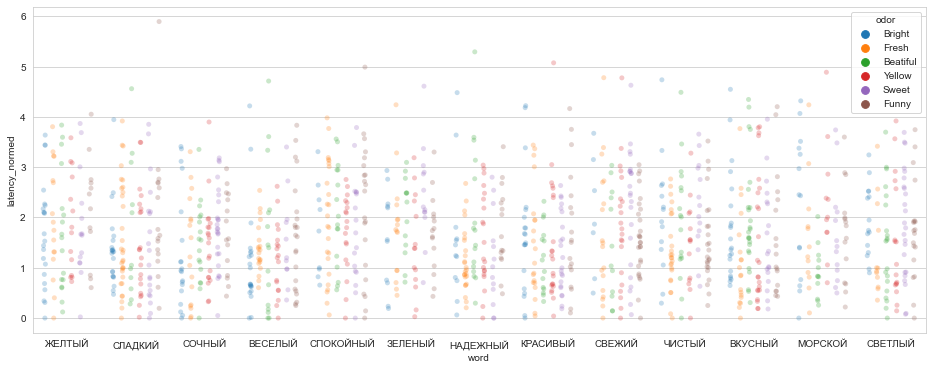

In [46]:
plt.figure(figsize=(16, 6))
sns.stripplot(x="word", y="latency_normed", hue='odor',
              data=data, dodge=True, alpha=.25, zorder=1)

<Figure size 1152x432 with 0 Axes>

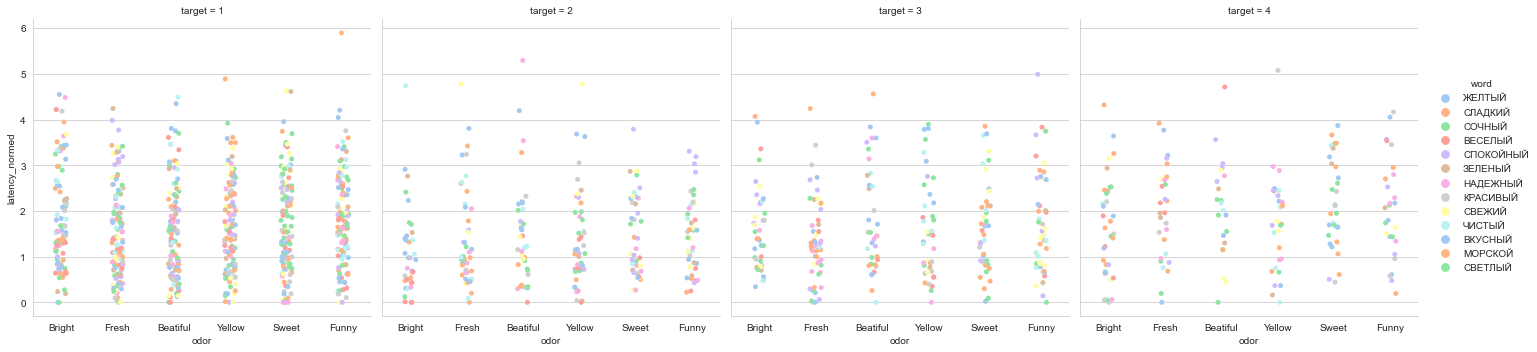

In [47]:
plt.figure(figsize=(16, 6))
# sns.boxplot(x="odor", y="latency",
#             hue="word",
#             data=df_clean)

sns.catplot(x="odor", y="latency_normed",
            hue="word", col='target',
            data=data, palette="pastel")

<Figure size 7200x7200 with 0 Axes>

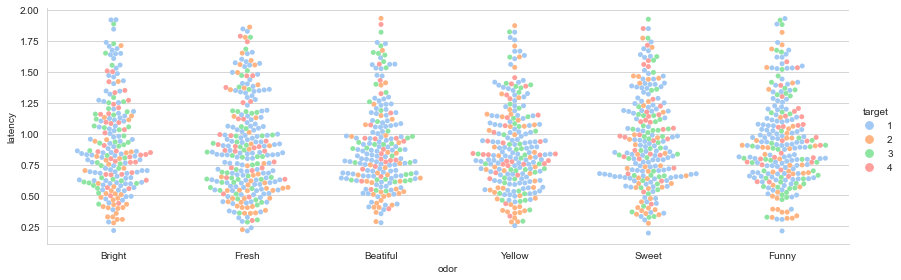

In [48]:
plt.figure(figsize=(100, 100))
sns.catplot(x="odor", y="latency",
                hue="target",
                data=data, kind="swarm",
                height=4, aspect=3, palette="pastel");
# plt.savefig("test.png")

## Word correlations

In [49]:
def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

<AxesSubplot:>

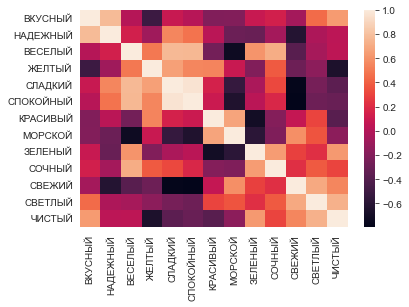

In [50]:
sns.heatmap(cluster_corr(pd.DataFrame(avgs, index=rows, columns=cols).corr()))